In [27]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

data = pd.read_csv("KNMI_20190217_hourly.txt",header=0)
data = data.dropna(axis=0,how= 'any')
data.columns = data.columns.str.strip() # removes the spaces in the column names

data_temp = data["T"]
df_zscore = (data_temp - data_temp.mean())/data_temp.std() # z score normalisation


random.seed()
gallons =[]
for temp in data_temp:
    y = random.gauss(df_zscore.mean(),df_zscore.std())
    if (y<0):
        y *= -1
    gallons.append(round(y,5))


def int2date(argdate: int) -> date:
    """
    If you have date as an integer, use this method to obtain a datetime.date object.

    Parameters
    ----------
    argdate : int
      Date as a regular integer value (example: 20160618)

    Returns
    -------
    dateandtime.date
      A date object which corresponds to the given value `argdate`.
    """
    year = int(argdate / 10000)
    month = int((argdate % 10000) / 100)
    day = int(argdate % 100)

    return date(year, month, day)

new_dataset = pd.concat([data.reset_index(drop=True), pd.DataFrame(gallons, columns=["Gallons"]).reset_index(drop=True)], axis=1, sort=False)
new_dataset = new_dataset.rename(columns={ new_dataset.columns[0]: "id" })
new_dataset["YYYYMMDD"] = new_dataset["YYYYMMDD"].astype(int).apply(int2date)
new_dataset["Gallons"] = new_dataset["Gallons"]*1000
new_dataset.to_csv("New dataset1.csv")


In [28]:
new_dataset["Gallons"]

0       1700.60
1        789.41
2       2026.76
3         45.35
4       1044.17
5        493.60
6        812.14
7       1036.90
8        287.21
9       1447.41
10       673.49
11       138.91
12       331.18
13      1253.64
14       602.50
15       368.56
16       232.03
17       592.46
18       439.00
19         2.87
20       120.23
21       293.07
22      1702.89
23      1424.01
24       797.73
25      1082.53
26       524.26
27       245.77
28      1237.83
29       262.79
         ...   
2274     307.45
2275     331.91
2276     854.43
2277     588.18
2278     837.26
2279      65.06
2280     469.80
2281     838.87
2282    1032.32
2283    1204.35
2284     315.54
2285     844.13
2286     221.86
2287    2425.25
2288    1483.05
2289    1569.82
2290     450.14
2291    1133.46
2292     759.37
2293     847.85
2294      99.83
2295     569.66
2296     343.03
2297     132.43
2298    1242.88
2299    2168.51
2300     793.55
2301     260.96
2302    1069.73
2303      53.41
Name: Gallons, Length: 2

In [40]:


new_dataset["YYYYMMDD"].astype(int).apply(int2date)



0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
5       2018-01-01
6       2018-01-01
7       2018-01-01
8       2018-01-01
9       2018-01-01
10      2018-01-01
11      2018-01-01
12      2018-01-01
13      2018-01-01
14      2018-01-01
15      2018-01-01
16      2018-01-01
17      2018-01-01
18      2018-01-01
19      2018-01-01
20      2018-01-01
21      2018-01-01
22      2018-01-01
23      2018-01-01
24      2018-01-02
25      2018-01-02
26      2018-01-02
27      2018-01-02
28      2018-01-02
29      2018-01-02
           ...    
2274    2019-02-16
2275    2019-02-16
2276    2019-02-16
2277    2019-02-16
2278    2019-02-16
2279    2019-02-16
2280    2019-02-17
2281    2019-02-17
2282    2019-02-17
2283    2019-02-17
2284    2019-02-17
2285    2019-02-17
2286    2019-02-17
2287    2019-02-17
2288    2019-02-17
2289    2019-02-17
2290    2019-02-17
2291    2019-02-17
2292    2019-02-17
2293    2019-02-17
2294    2019-02-17
2295    2019

In [36]:
new_dataset["YYYYMMDD"]

0       20180101.0
1       20180101.0
2       20180101.0
3       20180101.0
4       20180101.0
5       20180101.0
6       20180101.0
7       20180101.0
8       20180101.0
9       20180101.0
10      20180101.0
11      20180101.0
12      20180101.0
13      20180101.0
14      20180101.0
15      20180101.0
16      20180101.0
17      20180101.0
18      20180101.0
19      20180101.0
20      20180101.0
21      20180101.0
22      20180101.0
23      20180101.0
24      20180102.0
25      20180102.0
26      20180102.0
27      20180102.0
28      20180102.0
29      20180102.0
           ...    
2274    20190216.0
2275    20190216.0
2276    20190216.0
2277    20190216.0
2278    20190216.0
2279    20190216.0
2280    20190217.0
2281    20190217.0
2282    20190217.0
2283    20190217.0
2284    20190217.0
2285    20190217.0
2286    20190217.0
2287    20190217.0
2288    20190217.0
2289    20190217.0
2290    20190217.0
2291    20190217.0
2292    20190217.0
2293    20190217.0
2294    20190217.0
2295    2019

In [74]:
data = pd.read_csv("KNMI_20190217_hourly.txt",header=0)
data = data.dropna(axis=0,how= 'any')
data.columns = data.columns.str.strip()
len(data)

2304

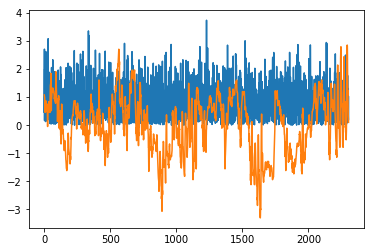

In [28]:
plt.plot(range(len(gallons)),gallons)
plt.plot(range(len(df_zscore)),df_zscore)

In [24]:
range(len(gallons))

range(0, 2305)

In [87]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object